In [1]:
import scdna_replication_tools


In [2]:
from scdna_replication_tools.pert_model import pyro_infer_scRT

In [7]:
import pandas as pd
import os
input_dir = "/home/htran/storage/raw_DLP/metastasis_DLP/SA919/A130854B/"
# input_gfn = os.path.join(input_dir, 'hmmcopy/filtered_reads_RT_g_cells.csv.gz') 
# input_sfn = os.path.join(input_dir, 'hmmcopy/filtered_reads_RT_s_cells.csv.gz') 
# cn_g = pd.read_csv(input_gfn,compression='gzip')
# cn_s = pd.read_csv(input_sfn,compression='gzip')
# print(cn_g.shape)
# print(cn_s.shape)

In [10]:
cell_clones_fn = os.path.join(input_dir, 'RT_input/A130854B_filtered_cell_clones.csv') 
cell_clones = pd.read_csv(cell_clones_fn)
import numpy as np
libary_id = 'A130854B'
cell_clones['library_id'] = np.repeat(libary_id,cell_clones.shape[0])
cell_clones.to_csv(os.path.join(input_dir, 'RT_input/A130854B_filtered_cell_clones_v2.csv'), index=False)
cell_clones.head(3)

,umap1,umap2,cell_id,clone_id,cell_type_status,library_id
0,1.381536,2.646117,AT13696-A130854B-R48-C07,C,cn_g,A130854B
1,3.415137,3.929123,AT13696-A130854B-R48-C08,C,cn_g,A130854B
2,4.676253,4.291981,AT13696-A130854B-R48-C09,C,cn_s,A130854B


In [11]:
os.path.join(input_dir, 'RT_input/A130854B_filtered_cell_clones_v2.csv')

'/home/htran/storage/raw_DLP/metastasis_DLP/SA919/A130854B/RT_input/A130854B_filtered_cell_clones_v2.csv'

In [33]:
select_values = cn_g['cell_id'].values
cells_clone_cut = cell_clones.query('cell_id in @select_values')  
cells_clone_cut.index = cells_clone_cut['cell_id'].values
# cells_clone_cut.loc['AT13696-A130854B-R48-C07',:]
cells_clone_cut = cells_clone_cut.loc[:,['cell_id','clone_id']]

In [19]:
# import numpy as np
# idxs, counts = np.unique(cn_g['cell_id'], return_counts=True)
# len(idxs) #707 g cells
# idxs, counts = np.unique(cn_s['cell_id'], return_counts=True)
# len(idxs) #296 s cells
# cn_s.columns
libary_id = 'A130854B'
cn_s['library_id'] = np.repeat(libary_id,cn_s.shape[0])


cn_g['library_id'] = np.repeat(libary_id,cn_g.shape[0])
cn_g1 = pd.merge(cn_g, cells_clone_cut, on='cell_id')

In [42]:
# temp_cn_s = cn_s[['cell_id', 'chr', 'start', 'end', 'gc', 'state', 'library_id', 'reads']]
temp_cn_g = cn_g1[['cell_id', 'chr', 'start', 'end', 'gc', 'state', 'library_id', 'clone_id','reads']]

In [37]:
argv = pd.Series(['reads', 'state', 'gc','clone_id','hmmcopy'], 
                 index=['input_col','cn_col','gc_col','clone_col','cn_prior_method'])
argv.cn_col
# :param cn_prior_method: Method for building the cn prior concentrations. Options are 'hmmcopy', 'g1_cells', 'g1_clones', 'g1_composite', 'diploid'. (str)

'state'

In [52]:
# temp_cn_s = cn_s[['cell_id', 'chr', 'start', 'end', argv.gc_col, argv.cn_col, 'library_id', argv.input_col]]
# temp_cn_g = cn_g[['cell_id', 'chr', 'start', 'end', argv.gc_col, argv.cn_col, 'library_id', argv.clone_col, argv.input_col]]
nb_iterations = 10 #1500
print('creating scrt object')
# create SPF object with input
scrt = scRT(temp_cn_s, temp_cn_g, input_col=argv.input_col, rt_prior_col=None, assign_col=argv.cn_col,
            cn_state_col=argv.cn_col, gc_col=argv.gc_col, cn_prior_method=argv.cn_prior_method, max_iter=nb_iterations)




creating scrt object


In [53]:
# run inference
print('running inference')
cn_s_with_scrt, supp_s_output, cn_g_with_scrt, supp_g_output = scrt.infer_pyro_model()


running inference


  4211038 Loading data
  4211039 ----------------------------------------


cn_s after assigning to clones
                           cell_id chr     start       end        gc  state  \
0        AT13696-A130854B-R48-C09   1   2000001   2500000  0.594508      2   
1        AT13696-A130854B-R48-C09   1   3000001   3500000  0.584572      2   
2        AT13696-A130854B-R48-C09   1   4000001   4500000  0.482574      2   
3        AT13696-A130854B-R48-C09   1   4500001   5000000  0.481828      2   
4        AT13696-A130854B-R48-C09   1   5000001   5500000  0.447446      2   
...                           ...  ..       ...       ...       ...    ...   
1294995  AT13696-A130854B-R68-C70   Y  18000001  18500000  0.380458      0   
1294996  AT13696-A130854B-R68-C70   Y  18500001  19000000  0.369494      0   
1294997  AT13696-A130854B-R68-C70   Y  20500001  21000000  0.386036      0   
1294998  AT13696-A130854B-R68-C70   Y  21000001  21500000  0.395094      0   
1294999  AT13696-A130854B-R68-C70   Y  21500001  22000000  0.381986      0   

        library_id  reads clone

  4363255 Start inference for G1-phase cells.
/home/htran/anaconda3/envs/myPython37/lib/python3.7/site-packages/pyro/poutine/subsample_messenger.py:171: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if len(shape) >= -dim and shape[dim] != 1:
/home/htran/Projects/hakwoo_project/testing_methods/scdna_replication_tools/src/scdna-replication-tools/scdna_replication_tools/pert_model.py:595: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  lamb = pyro.param('expose_lambda', torch.tensor([lambda_init]), constraint=constraint

In [47]:
import sklearn.cluster

In [48]:
from scdna_replication_tools.compute_consensus_clone_profiles import compute_consensus_clone_profiles
from scdna_replication_tools.assign_s_to_clones import assign_s_to_clones
from scdna_replication_tools.bulk_gc_correction import bulk_g1_gc_correction
from scdna_replication_tools.normalize_by_cell import normalize_by_cell
from scdna_replication_tools.normalize_by_clone import normalize_by_clone
from scdna_replication_tools.binarize_rt_profiles import binarize_profiles
from scdna_replication_tools.compute_pseudobulk_rt_profiles import compute_pseudobulk_rt_profiles
from scdna_replication_tools.calculate_twidth import compute_time_from_scheduled_column, calculate_twidth
# from scdna_replication_tools.cncluster import kmeans_cluster
from scdna_replication_tools.pert_model import pyro_infer_scRT
from argparse import ArgumentParser


In [49]:
from scdna_replication_tools.cncluster import kmeans_cluster

In [51]:
from scdna_replication_tools.infer_scRT import scRT

In [60]:
print(cn_s_with_scrt.shape)
# print(cn_s_with_scrt.__class__)
cn_s_with_scrt.columns

(1295000, 14)


Index(['cell_id', 'chr', 'start', 'end', 'gc', 'state', 'library_id', 'reads',
       'clone_id', 'model_cn_state', 'model_rep_state', 'model_tau', 'model_u',
       'model_rho'],
      dtype='object')

In [61]:
# cn_s_with_scrt, supp_s_output, cn_g_with_scrt, supp_g_output
cn_s_with_scrt.to_csv(os.path.join(input_dir,'RT_results/cn_s_with_scrt.csv.gz'))
supp_s_output.to_csv(os.path.join(input_dir,'RT_results/supp_s_output.csv.gz'))
cn_g_with_scrt.to_csv(os.path.join(input_dir,'RT_results/cn_g_with_scrt.csv.gz'))
supp_g_output.to_csv(os.path.join(input_dir,'RT_results/supp_g_output.csv.gz'))

In [91]:
# import pandas as pd
# import numpy as np
import statsmodels.api as sm
from argparse import ArgumentParser
def autocorr(data, min_lag=10, max_lag=50):
    acorr = sm.tsa.acf(data, nlags=max_lag)
    return np.mean(acorr[min_lag-1:])


def breakpoints(data):
    temp_diff = np.diff(data)
    return sum(np.where(temp_diff!=0, 1, 0))


def compute_cell_frac(cn, frac_rt_col='cell_frac_rep', rep_state_col='model_rep_state'):
    ''' Compute the fraction of replicated bins for all cells in `cn`, noting which cells have extreme values. '''
    cn['extreme_cell_frac'] = False
    for cell_id, cell_cn in cn.groupby('cell_id'):
        temp_rep = cell_cn[rep_state_col].values
        temp_frac = sum(temp_rep) / len(temp_rep)
        cn.loc[cell_cn.index, frac_rt_col] = temp_frac

        if temp_frac > 0.95 or temp_frac < 0.05:
            cn.loc[cell_cn.index, 'extreme_cell_frac'] = True
    return cn


def compute_cell_frac_v2(cn, frac_rt_col='cell_frac_rep', rep_state_col='model_rep_state'):
    ''' Compute the fraction of replicated bins for all cells in `cn`, noting which cells have extreme values. '''
    cn['extreme_cell_frac'] = False
    cell_metrics = []
    for cell_id, cell_cn in cn.groupby('cell_id'):
        temp_rep = cell_cn[rep_state_col].values
        temp_frac = sum(temp_rep) / len(temp_rep)
        cn.loc[cell_cn.index, frac_rt_col] = temp_frac

        if temp_frac > 0.95 or temp_frac < 0.05:
            cn.loc[cell_cn.index, 'extreme_cell_frac'] = True
         
        temp_df = pd.DataFrame({
            'cell_id': [cell_id], 'cell_frac_rep': temp_frac
        })
        cell_metrics.append(temp_df)

    cell_metrics = pd.concat(cell_metrics, ignore_index=True)
#     return cn

    return cell_metrics




def remove_nonreplicating_cells(cn, frac_rt_col='cell_frac_rep'):
    # use extreme_cell_frac status and cell cycle classifier features to nominate "bad" non-replicating cells
    extreme_cells = cn.loc[(cn['extreme_cell_frac']==True)]
    # bad_cells_df = extreme_cells.loc[(extreme_cells['corrected_breakpoints']<0.0) | (extreme_cells['corrected_madn']<0.0)]
    # bad_cells = bad_cells_df.cell_id.unique()
    bad_cells = extreme_cells.cell_id.unique()

    cn_good = cn[~cn['cell_id'].isin(bad_cells)].reset_index(drop=True)
    cn_bad = cn[cn['cell_id'].isin(bad_cells)].reset_index(drop=True)

    return cn_good, cn_bad


def compute_quality_features(cn, rep_state_col='model_rep_state', cn_state_col='model_cn_state', rpm_col='rpm'):
    cell_metrics = []
    for cell_id, cell_cn in cn.groupby('cell_id'):
        # compute read depth autocorrelation
        rpm_auto = autocorr(cell_cn[rpm_col].values)
        # compute replication state autocorrelation
        rep_auto = autocorr(cell_cn[rep_state_col].values)
        # compute number of breakpoints for inferred CN
        cn_bk = breakpoints(cell_cn[cn_state_col].values)
        # compute number of breakpoints for inferred rep states
        rep_bk = breakpoints(cell_cn[rep_state_col].values)
        # compute fraction of genome with inferred CN=0
        frac_cn0 = sum(cell_cn[cn_state_col]==0) / cell_cn.shape[0]

        temp_df = pd.DataFrame({
            'cell_id': [cell_id], 'rpm_auto': [rpm_auto], 'rep_auto': [rep_auto],
            'cn_bk': [cn_bk], 'rep_bk': [rep_bk], 'frac_cn0': [frac_cn0]
        })
        cell_metrics.append(temp_df)

    cell_metrics = pd.concat(cell_metrics, ignore_index=True)
    
    # normalize autocorrelations by mean values
    rpm_auto_mean = np.mean(cell_metrics['rpm_auto'].values)
    cell_metrics['rpm_auto_norm'] = cell_metrics['rpm_auto'] - rpm_auto_mean
    rep_auto_mean = np.mean(cell_metrics['rep_auto'].values)
    cell_metrics['rep_auto_norm'] = cell_metrics['rep_auto'] - rep_auto_mean

    # merge quality features into cn
    cn = pd.merge(cn, cell_metrics)
    
#     return cn
    return cell_metrics


def remove_low_quality_cells(cn):
    # set thresholds on which cells are high or low quality
    # note that this thresholding takes place after removing cells with extreme fractions of replicated bins
    low_qual_cells = cn.loc[(cn['rpm_auto']>0.5) | (cn['rep_auto']>0.2) | (cn['frac_cn0']>0.05)].cell_id.unique()

    cn_good = cn[~cn['cell_id'].isin(low_qual_cells)].reset_index(drop=True)
    cn_bad = cn[cn['cell_id'].isin(low_qual_cells)].reset_index(drop=True)

    return cn_good, cn_bad



In [64]:
cn_s_with_scrt.columns

Index(['cell_id', 'chr', 'start', 'end', 'gc', 'state', 'library_id', 'reads',
       'clone_id', 'model_cn_state', 'model_rep_state', 'model_tau', 'model_u',
       'model_rho'],
      dtype='object')

In [65]:
cn_s_with_scrt.head(3)

,cell_id,chr,start,end,gc,state,library_id,reads,clone_id,model_cn_state,model_rep_state,model_tau,model_u,model_rho
0,AT13696-A130854B-R48-C09,1,2000001,2500000,0.594508,2,A130854B,55,C,2,0.0,0.109919,31.623632,0.528842
1,AT13696-A130854B-R48-C10,1,2000001,2500000,0.594508,1,A130854B,33,C,3,0.0,0.381491,17.580654,0.528842
2,AT13696-A130854B-R48-C14,1,2000001,2500000,0.594508,1,A130854B,7,C,3,0.0,0.362707,3.382090,0.528842


In [66]:
argv = pd.Series(['reads', 'state', 'gc','clone_id','hmmcopy',
                 'model_cn_state','model_rep_state','reads'], 
                 index=['input_col','cn_col','gc_col','clone_col','cn_prior_method',
                       'frac_rt_col','rep_col','rpm_col'])

# p.add_argument('frac_rt_col', type=str, help='column name for the fraction of replicated bins in a cell')
#     p.add_argument('rep_col', type=str, help='column name for replicated status of each bin in pyro model')
#     p.add_argument('cn_col', type=str, help='column name for inferred cn state of each bin in pyro model')
#     p.add_argument('rpm_col', type=str, help='column name for reads per million')
#     p.add_argument('output_s', type=str, help='pyro model for s-phase cells after filtering')
#     p.add_argument('output_g', type=str, help='pyro model results for nonreplicating cells that get removed')
#     p.add_argument('output_lowqual', type=str, help='pyro model results for low quality cells that get removed')


In [75]:
cn = pd.concat([cn_s_with_scrt, cn_g_with_scrt], ignore_index=True)

# compute the fraction of replicated bins within each cell
# cn = compute_cell_frac(cn, frac_rt_col=argv.frac_rt_col, rep_state_col=argv.rep_col)

# compute autocorrelation features to see which cells are truly low quality
cell_metrics = compute_quality_features(cn,  rpm_col=argv.rpm_col) #rep_state_col=argv.rep_col, cn_state_col=argv.cn_col,


/home/htran/anaconda3/envs/myPython37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/home/htran/anaconda3/envs/myPython37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [97]:
cell_metrics_RT_frac = compute_cell_frac_v2(cn, frac_rt_col='cell_frac_rep', rep_state_col='model_rep_state')

In [77]:
cell_metrics.shape
# cn.columns
cell_metrics.head(3)

,cell_id,rpm_auto,rep_auto,cn_bk,rep_bk,frac_cn0,rpm_auto_norm,rep_auto_norm
0,AT13696-A130854B-R48-C07,0.486637,0.011834,3031,454,0.004800,0.011259,NaN
1,AT13696-A130854B-R48-C08,0.487502,0.018834,3176,660,0.005257,0.012125,NaN
2,AT13696-A130854B-R48-C09,0.389019,-0.001152,3037,6,0.024000,-0.086359,NaN


In [86]:
cell_clones = cell_clones.loc[:,['cell_id','clone_id','cell_type_status']]
cell_metrics1 = pd.merge(cell_metrics, cell_clones, on='cell_id')
cell_metrics1.shape
# cell_clones.shape

(1003, 10)

In [100]:
cell_metrics_RT_frac = pd.merge(cell_metrics_RT_frac, cell_clones, on='cell_id')
cell_metrics_RT_frac.shape
cell_metrics_RT_frac.columns

Index(['cell_id', 'cell_frac_rep', 'clone_id', 'cell_type_status'], dtype='object')

<AxesSubplot:xlabel='rep_bk', ylabel='cell_type_status'>

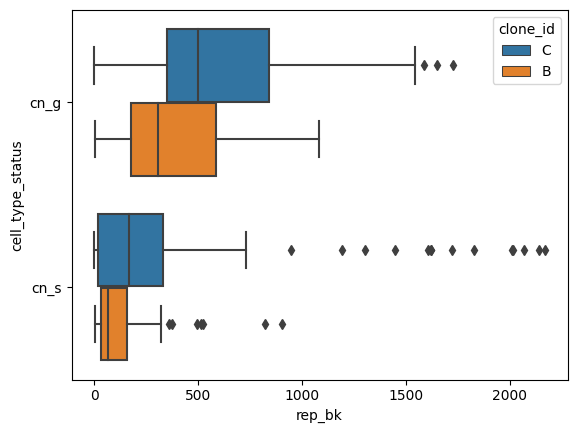

In [90]:
import seaborn as sns
sns.boxplot(data=cell_metrics1, x="rep_bk", y="cell_type_status", hue="clone_id") #"rep_auto"

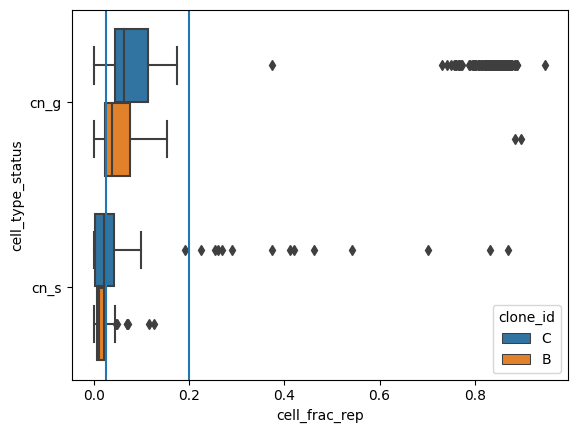

In [103]:
import seaborn as sns
p = sns.boxplot(data=cell_metrics_RT_frac, x="cell_frac_rep", y="cell_type_status", hue="clone_id") #"rep_auto"
p.axvline(0.025)
p.axvline(0.2)